In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [69]:
df = pd.read_csv("btc.csv")
df = df.loc[:,['time','PriceUSD']]
df.dropna(inplace=True)
df['time'] = pd.to_datetime(df['time'], errors='coerce')

df.head(5)

,time,PriceUSD
561,2010-07-18,0.085840
562,2010-07-19,0.080800
563,2010-07-20,0.074736
564,2010-07-21,0.079193
565,2010-07-22,0.058470


In [70]:
df_trends = pd.read_csv("multiTimeline.csv")

#Convierto la fecha a DateTime y filtro a partir de la fecha que me interesa
df_trends.Time= pd.to_datetime(df_trends.Time, errors='coerce')
df_trends=df_trends.loc[df_trends.Time >= pd.to_datetime('2010-07-01')]

#Para el Interest Rate reemplazo los <1 por 0, y cambio el tipo de dato a int 
df_trends.BitcoinInterestRate.replace({'<1':'0'}, inplace=True)
df_trends.BitcoinInterestRate = df_trends.BitcoinInterestRate.astype(int)

df_trends.head()

,Time,BitcoinInterestRate
78,2010-07-01,0
79,2010-08-01,0
80,2010-09-01,0
81,2010-10-01,0
82,2010-11-01,0


In [71]:
# Llevo el InterestRate a la misma escala en que está el precio del BTC para poder comparar en el gráfico
df_trends_escalado = df_trends.copy()
df_trends_escalado.BitcoinInterestRate = df_trends.BitcoinInterestRate * (df.PriceUSD.max()/100)

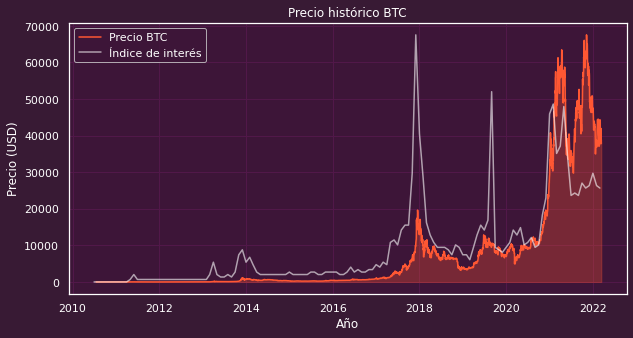

In [72]:
sns.set(rc={'axes.facecolor':'3D1538', 'figure.facecolor':'381A34', 'grid.color':'#511849', 
            'text.color':'white',"xtick.color":'white', "ytick.color":'white', "axes.labelcolor":'white'})

plt.figure(figsize=[10,5])
sns.lineplot(data=df, x='time', y='PriceUSD', color='#ff5733', label= 'Precio BTC')
plt.fill_between(df['time'], df['PriceUSD'], color = '#ff5733', alpha=0.3)
sns.lineplot(data=df_trends_escalado, x='Time', y='BitcoinInterestRate', color='white',alpha =0.6 , label='Índice de interés')
plt.title("Precio histórico BTC")
plt.ylabel("Precio (USD)")
plt.xlabel("Año")
plt.legend()
plt.show()

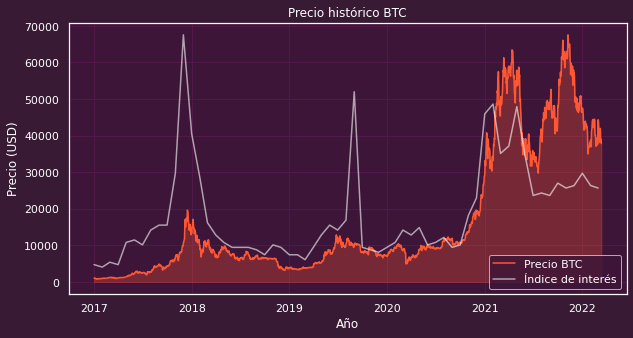

In [73]:
df2 = df[df.time.apply(lambda x: x.year > 2016)]
df_trends2 = df_trends_escalado[df_trends.Time.apply(lambda x: x.year > 2016)]

sns.set(rc={'axes.facecolor':'3D1538', 'figure.facecolor':'381A34', 'grid.color':'#511849', 
            'text.color':'white',"xtick.color":'white', "ytick.color":'white', "axes.labelcolor":'white'})

plt.figure(figsize=[10,5])
sns.lineplot(data=df2, x='time', y='PriceUSD', color='#ff5733', label= 'Precio BTC')
plt.fill_between(df2['time'], df2['PriceUSD'], color = '#ff5733', alpha=0.3)
sns.lineplot(data=df_trends2, x='Time', y='BitcoinInterestRate', color='white',alpha =0.6 , label='Índice de interés')
plt.title("Precio histórico BTC")
plt.ylabel("Precio (USD)")
plt.xlabel("Año")
plt.legend()
plt.show()

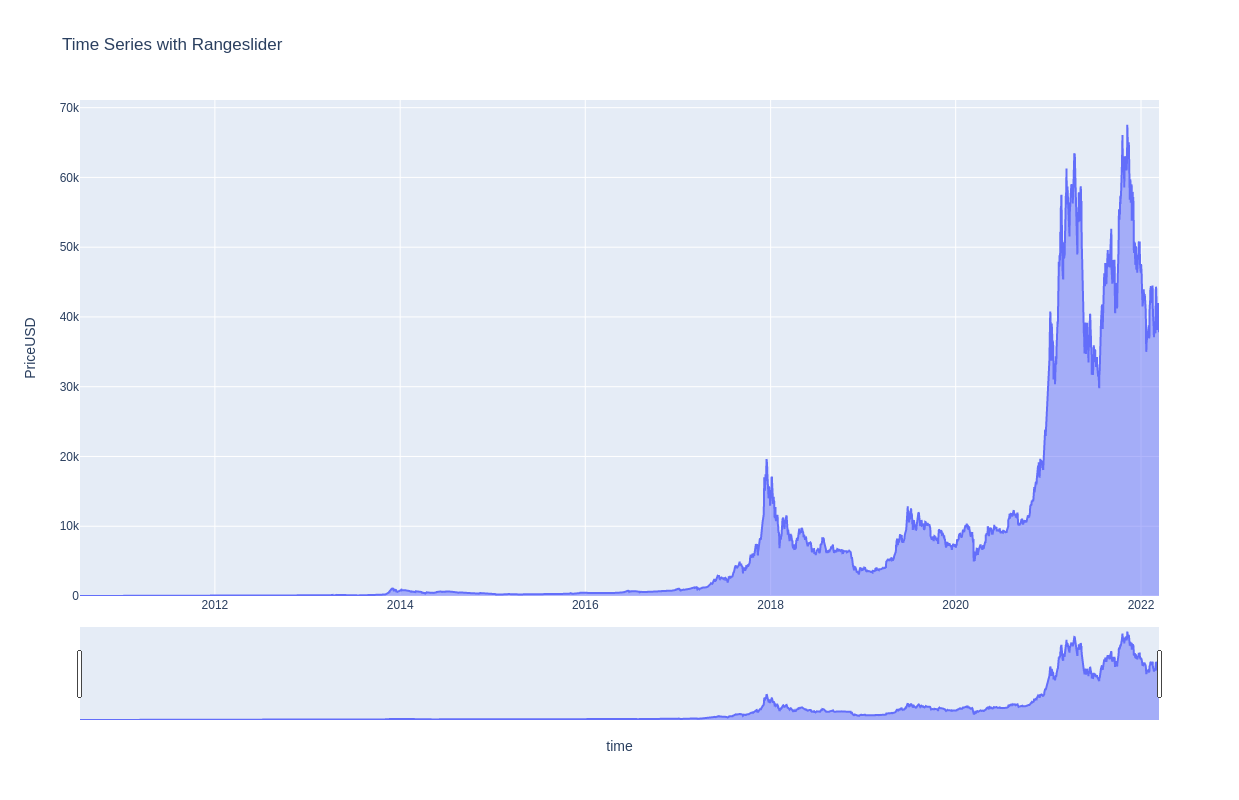

In [74]:
fig = px.area(df, x='time', y='PriceUSD', title='Time Series with Rangeslider', width=1000 ,height=800)
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [75]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode

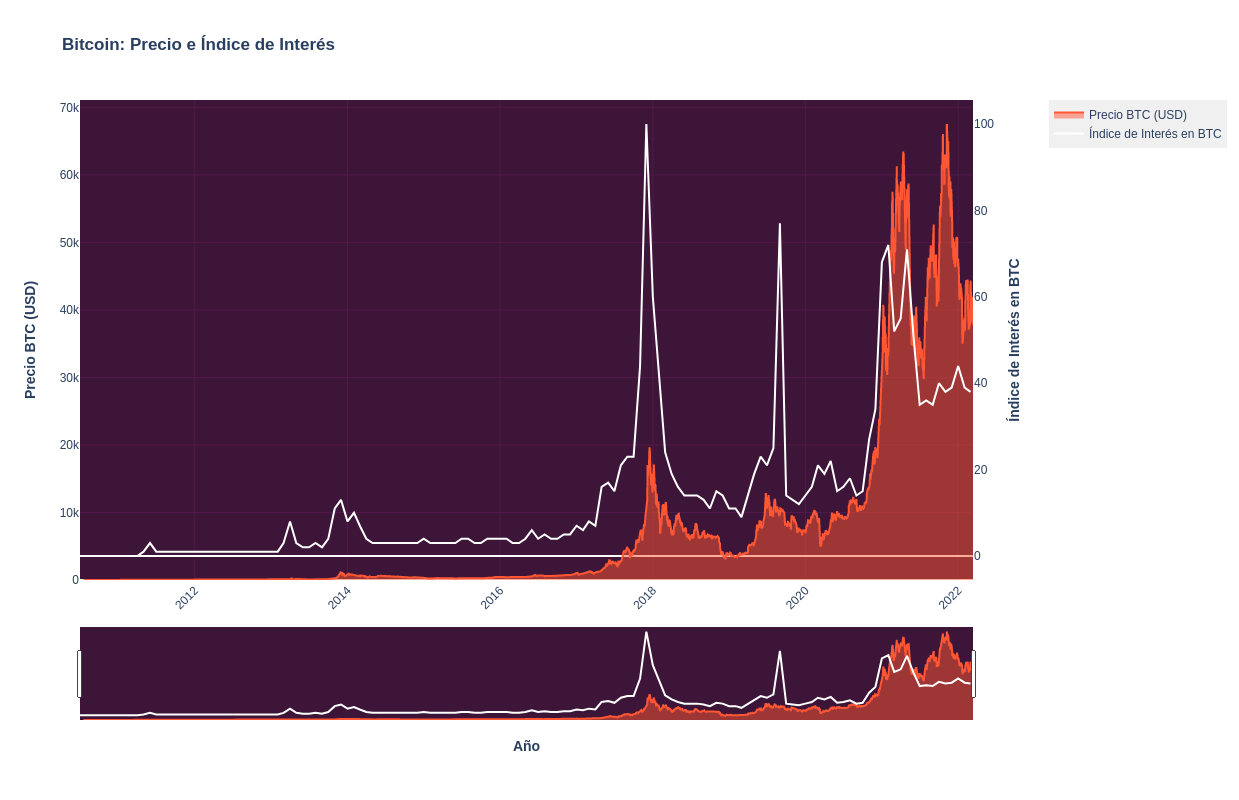

In [91]:
trace1 = go.Line(x=df.time, y=df.PriceUSD, fill='tozeroy', name='Precio BTC (USD)', line_color="#ff5733")
trace2 = go.Line(x=df_trends.Time, y=df_trends.BitcoinInterestRate, name='Índice de Interés en BTC', line_color ="white")

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig['layout'].update(height = 800, width = 1200, title = '<b>Bitcoin: Precio e Índice de Interés<b>',xaxis=dict(tickangle=-45),
                     plot_bgcolor="#3D1538", paper_bgcolor='white', legend = dict(bgcolor = '#F0F0F0'))

fig.update_yaxes(title_text="<b>Precio BTC (USD)</b>", secondary_y=False,gridcolor="#511849")
fig.update_yaxes(title_text="<b>Índice de Interés en BTC</b>", secondary_y=True, showgrid=False)
fig.update_xaxes(title_text="<b>Año<b>", rangeslider_visible=True, gridcolor="#511849")
iplot(fig)

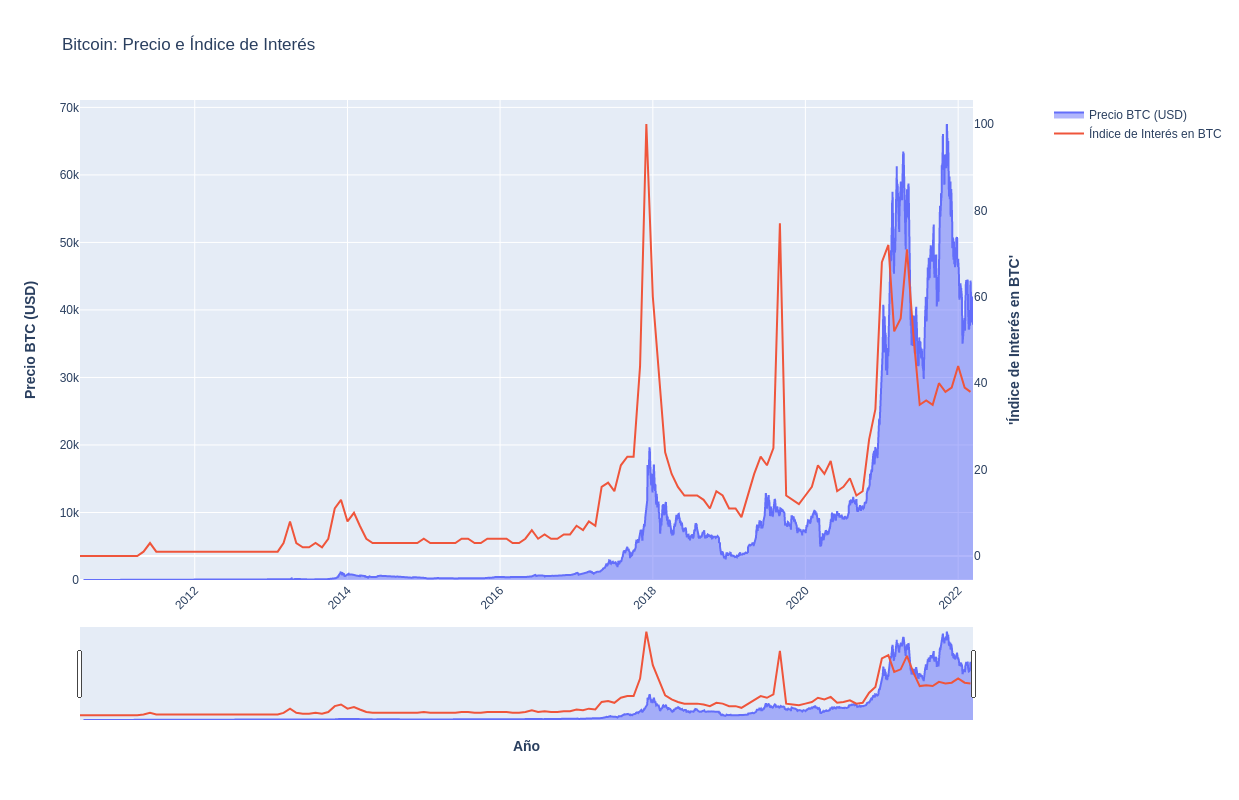

In [85]:
trace1 = go.Line(x=df.time, y=df.PriceUSD, fill='tozeroy', name='Precio BTC (USD)')
trace2 = go.Line(x=df_trends.Time, y=df_trends.BitcoinInterestRate, name='Índice de Interés en BTC')

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True, |)
fig['layout'].update(height = 800, width = 1200, title = 'Bitcoin: Precio e Índice de Interés',xaxis=dict(tickangle=-45))

fig.update_yaxes(title_text="<b>Precio BTC (USD)</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>'Índice de Interés en BTC'</b>", secondary_y=True,showgrid=False)
fig.update_xaxes(title_text="<b>Año<b>", rangeslider_visible=True)
iplot(fig)